In [1]:
import importlib
import matplotlib.pyplot as plt
import benchmark_module
importlib.reload(benchmark_module)

<module 'benchmark_module' from '/Users/kevinliu/Desktop/cs2241/search-forests/benchmark_module.cpython-312-darwin.so'>

In [2]:
from benchmark_module import benchmark, generate_zipf_queries, RandomEngine

In [3]:
NUM_KEYS = 100_000
NUM_QUERIES = 100_000
ZIPF_ALPHA = 2.0
gen = RandomEngine(seed=42)

In [4]:
def plot_res(li, structures, query_stats, insert_stats, x_label, y_label):
    w = 0.12
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,6))

    x = range(len(li))
    for i, s in enumerate(structures):
        y = [insert_stats[a][s] for a in li]
        ax1.bar([xi + i * w for xi in x], y, width=w, label=s)
    ax1.set_xticks([xi + (len(structures) - 1) * w / 2 for xi in x])
    ax1.set_xticklabels(li)
    ax1.set_xlabel(x_label)
    ax1.set_ylabel(f"{y_label} (insert)")
    ax1.legend(loc="upper left")

    x2 = range(len(li))
    for i, s in enumerate(structures):
        y2 = [query_stats[a][s] for a in li]
        ax2.bar([xi + i * w for xi in x], y2, width=w, label=s)
    ax2.set_xticks([xi + (len(structures) - 1) * w / 2 for xi in x2])
    ax2.set_xticklabels(li)
    ax2.set_xlabel(x_label)
    ax2.set_ylabel(f"{y_label} (query)")
    ax2.legend(loc="upper left")

    plt.tight_layout()
    plt.show()

In [9]:
def run_key_experiments(keys, delta=0.0, query=NUM_QUERIES, alpha=ZIPF_ALPHA, gen=gen):
    for measure in ["comparisons", "compactions", "mispredictions", "promotions"]:
        query_stats = {}
        insert_stats = {}

        for key in keys:
            queries = generate_zipf_queries(key, query, alpha, gen)
            out = benchmark(queries, key, delta, gen)

            query_stats[key] = out["queries"][measure]
            insert_stats[key] = out["inserts"][measure]

        structures = list(query_stats[keys[0]].keys())
        print("*" * 40)
        print(query_stats)
        print(insert_stats)
        print("*" * 40)

        y_label = f"Number of {measure}"
        if measure == "comparisons":
            y_label = "Avg number of comparisons"

        plot_res(keys, structures, query_stats, insert_stats, "Number of keys", y_label)



================== INSERTS ==================
Total: 1000
Comparisons: 
  red-black tree:     28.96
  f-forest:           23.22
  learned f-forest:   21.17
  r-forest:           23.22
  learned r-forest:   15.35
  robust-sl:          10.93
  learned treap:      5.77

================== QUERIES ==================
Total: 1000
Comparisons: 
  red-black tree:     11.45
  f-forest:           16.82
  learned f-forest:   9.51
  r-forest:           44.08
  learned r-forest:   16.96
  robust-sl:          28.78
  learned treap:      15.48

================== INSERTS ==================
Total: 5000
Comparisons: 
  red-black tree:     38.29
  f-forest:           31.85
  learned f-forest:   22.09
  r-forest:           31.85
  learned r-forest:   17.78
  robust-sl:          13.89
  learned treap:      8.03

================== QUERIES ==================
Total: 5000
Comparisons: 
  red-black tree:     13.85
  f-forest:           33.57
  learned f-forest:   9.64
  r-forest:           93.54
  learned r-

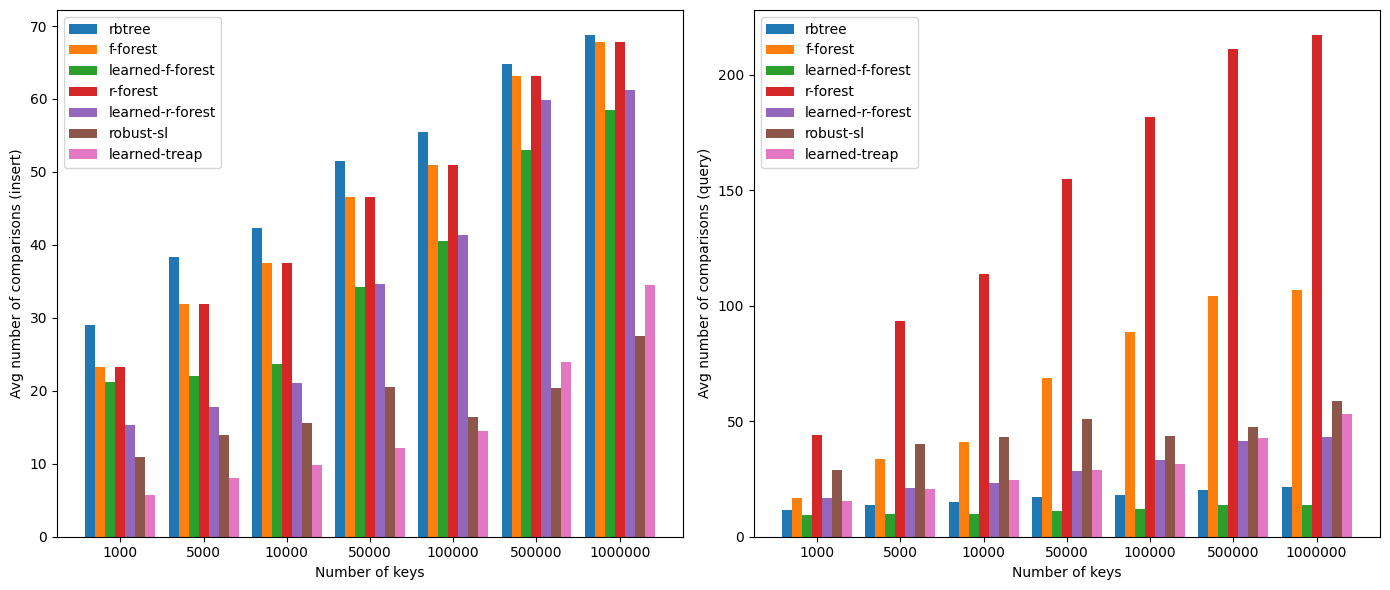


================== INSERTS ==================
Total: 1000
Comparisons: 
  red-black tree:     28.96
  f-forest:           23.22
  learned f-forest:   21.17
  r-forest:           23.22
  learned r-forest:   15.20
  robust-sl:          10.41
  learned treap:      7.06

================== QUERIES ==================
Total: 1000
Comparisons: 
  red-black tree:     11.44
  f-forest:           16.84
  learned f-forest:   9.48
  r-forest:           44.35
  learned r-forest:   17.10
  robust-sl:          26.99
  learned treap:      17.04

================== INSERTS ==================
Total: 5000
Comparisons: 
  red-black tree:     38.29
  f-forest:           31.85
  learned f-forest:   22.09
  r-forest:           31.85
  learned r-forest:   17.83
  robust-sl:          11.01
  learned treap:      8.67

================== QUERIES ==================
Total: 5000
Comparisons: 
  red-black tree:     13.89
  f-forest:           33.76
  learned f-forest:   9.64
  r-forest:           94.48
  learned r-

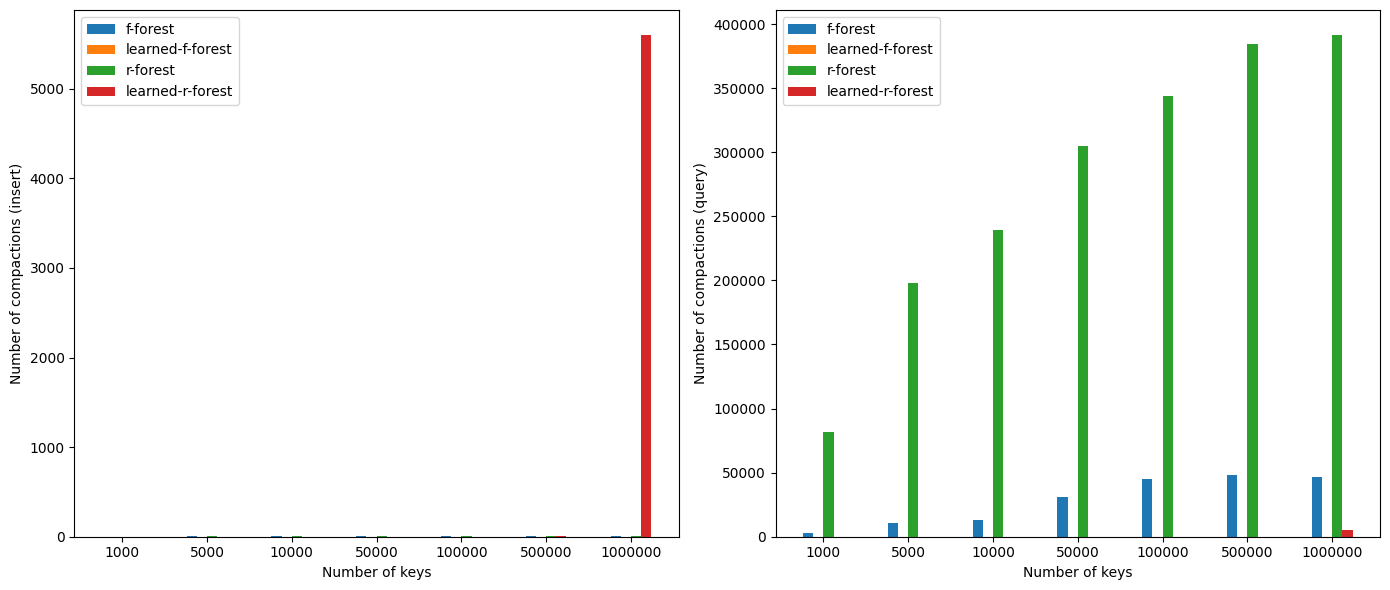


================== INSERTS ==================
Total: 1000
Comparisons: 
  red-black tree:     28.96
  f-forest:           23.22
  learned f-forest:   21.17
  r-forest:           23.22
  learned r-forest:   15.17
  robust-sl:          12.98
  learned treap:      7.21

================== QUERIES ==================
Total: 1000
Comparisons: 
  red-black tree:     11.32
  f-forest:           16.83
  learned f-forest:   9.43
  r-forest:           44.25
  learned r-forest:   17.17
  robust-sl:          31.26
  learned treap:      16.65

================== INSERTS ==================
Total: 5000
Comparisons: 
  red-black tree:     38.29
  f-forest:           31.85
  learned f-forest:   22.09
  r-forest:           31.85
  learned r-forest:   17.83
  robust-sl:          13.71
  learned treap:      8.00

================== QUERIES ==================
Total: 5000
Comparisons: 
  red-black tree:     13.90
  f-forest:           33.68
  learned f-forest:   9.64
  r-forest:           93.99
  learned r-

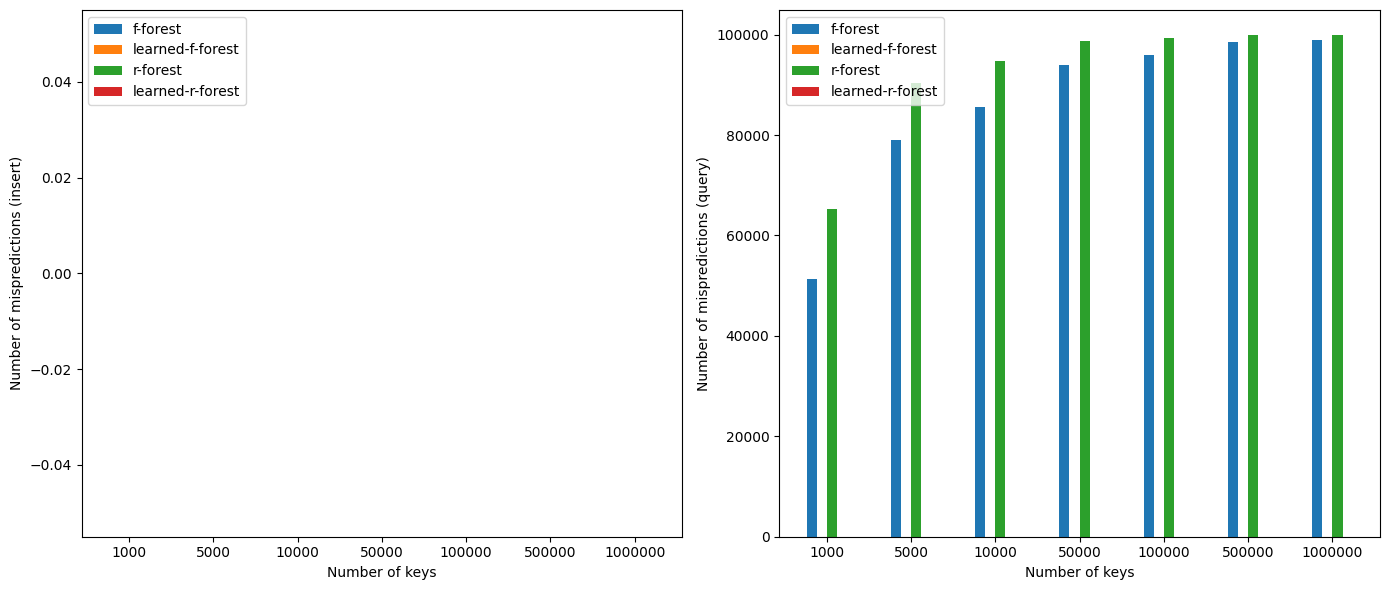


================== INSERTS ==================
Total: 1000
Comparisons: 
  red-black tree:     28.96
  f-forest:           23.22
  learned f-forest:   21.17
  r-forest:           23.22
  learned r-forest:   15.13
  robust-sl:          11.00
  learned treap:      6.82

================== QUERIES ==================
Total: 1000
Comparisons: 
  red-black tree:     11.37
  f-forest:           16.78
  learned f-forest:   9.45
  r-forest:           44.18
  learned r-forest:   17.07
  robust-sl:          28.81
  learned treap:      15.40

================== INSERTS ==================
Total: 5000
Comparisons: 
  red-black tree:     38.29
  f-forest:           31.85
  learned f-forest:   22.09
  r-forest:           31.85
  learned r-forest:   17.84
  robust-sl:          12.16
  learned treap:      8.36

================== QUERIES ==================
Total: 5000
Comparisons: 
  red-black tree:     13.90
  f-forest:           33.64
  learned f-forest:   9.66
  r-forest:           94.46
  learned r-

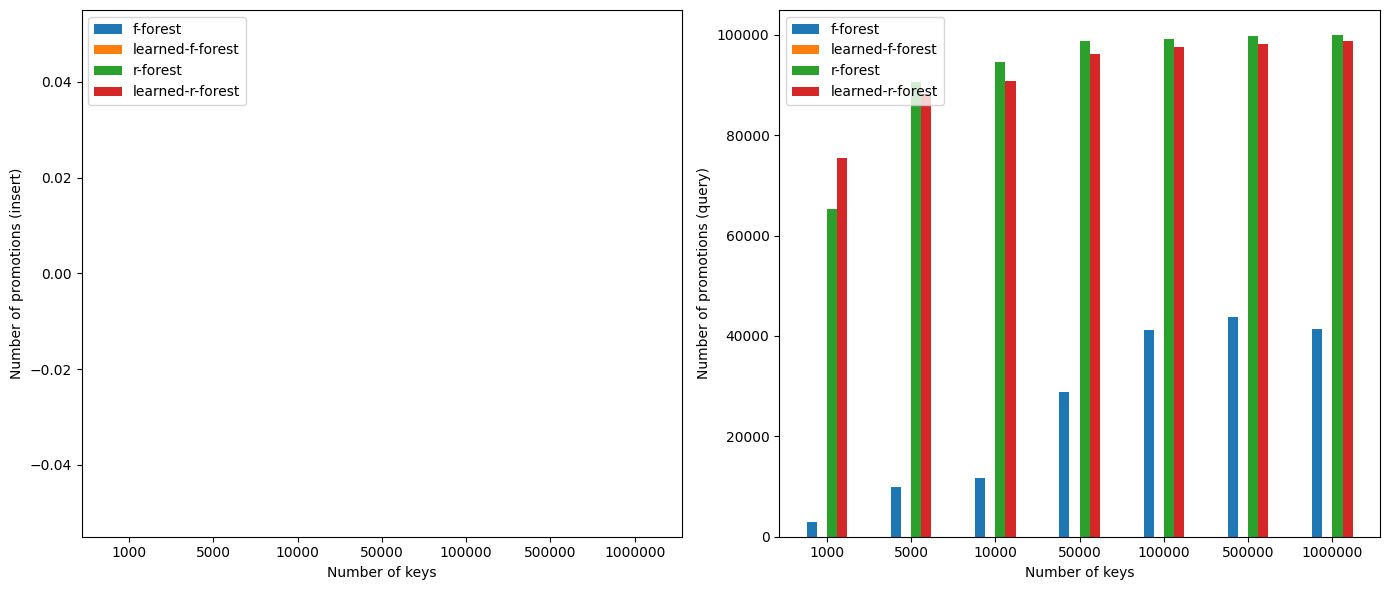

In [6]:
keys = [1_000, 5_000, 10_000, 50_000, 100_000, 500_000, 1_000_000]
run_key_experiments(keys)


================== INSERTS ==================
Total: 100
Comparisons: 
  red-black tree:     16.18
  f-forest:           16.18
  learned f-forest:   16.18
  r-forest:           16.18
  learned r-forest:   14.64
  robust-sl:          5.33
  learned treap:      4.56

================== QUERIES ==================
Total: 100
Comparisons: 
  red-black tree:     8.17
  f-forest:           8.17
  learned f-forest:   8.17
  r-forest:           8.17
  learned r-forest:   10.54
  robust-sl:          17.50
  learned treap:      13.53

================== INSERTS ==================
Total: 500
Comparisons: 
  red-black tree:     25.03
  f-forest:           21.22
  learned f-forest:   21.16
  r-forest:           21.22
  learned r-forest:   15.22
  robust-sl:          9.08
  learned treap:      4.66

================== QUERIES ==================
Total: 500
Comparisons: 
  red-black tree:     10.42
  f-forest:           12.35
  learned f-forest:   9.35
  r-forest:           26.59
  learned r-forest:  

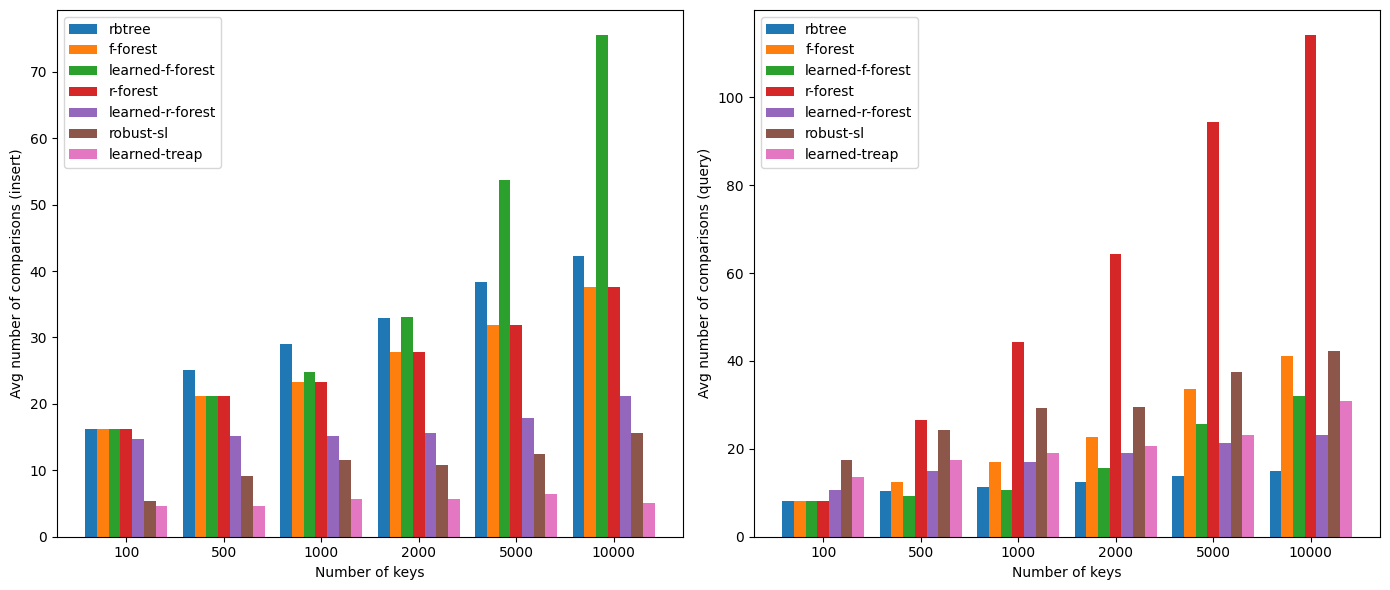


================== INSERTS ==================
Total: 100
Comparisons: 
  red-black tree:     16.18
  f-forest:           16.18
  learned f-forest:   16.18
  r-forest:           16.18
  learned r-forest:   13.84
  robust-sl:          6.94
  learned treap:      3.96

================== QUERIES ==================
Total: 100
Comparisons: 
  red-black tree:     8.19
  f-forest:           8.19
  learned f-forest:   8.19
  r-forest:           8.19
  learned r-forest:   10.39
  robust-sl:          20.63
  learned treap:      12.54

================== INSERTS ==================
Total: 500
Comparisons: 
  red-black tree:     25.03
  f-forest:           21.22
  learned f-forest:   21.16
  r-forest:           21.22
  learned r-forest:   15.13
  robust-sl:          9.77
  learned treap:      4.92

================== QUERIES ==================
Total: 500
Comparisons: 
  red-black tree:     10.36
  f-forest:           12.50
  learned f-forest:   9.35
  r-forest:           26.77
  learned r-forest:  

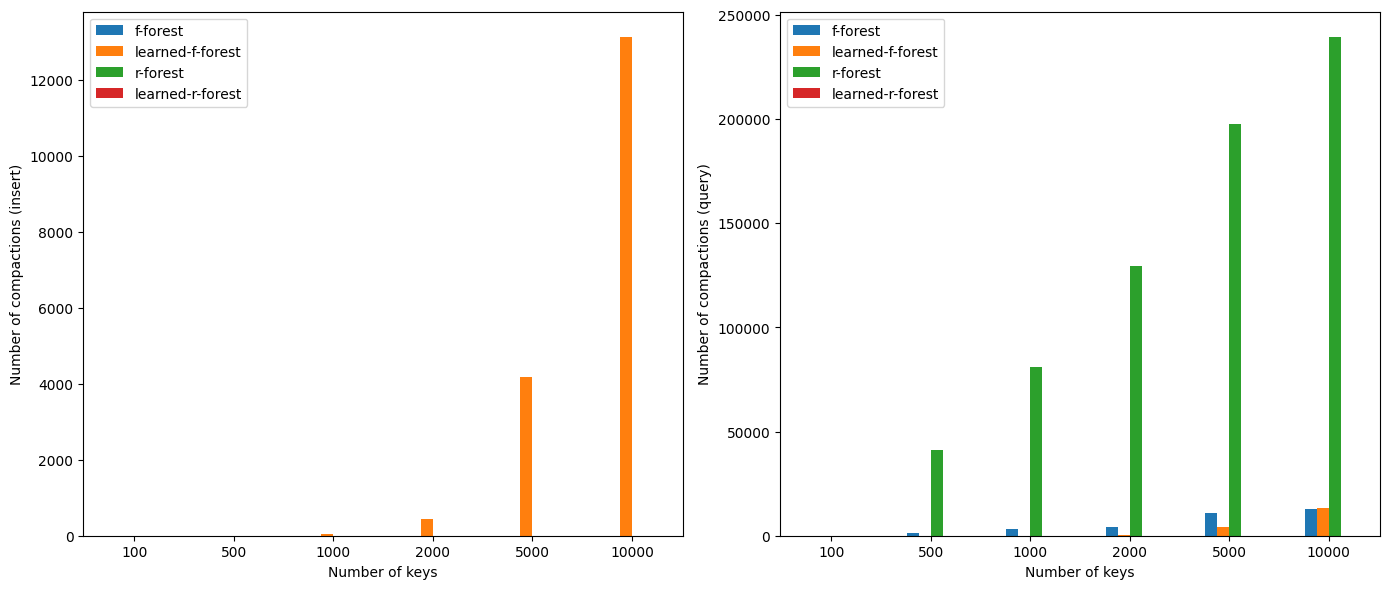


================== INSERTS ==================
Total: 100
Comparisons: 
  red-black tree:     16.18
  f-forest:           16.18
  learned f-forest:   16.18
  r-forest:           16.18
  learned r-forest:   14.30
  robust-sl:          5.49
  learned treap:      4.47

================== QUERIES ==================
Total: 100
Comparisons: 
  red-black tree:     8.10
  f-forest:           8.10
  learned f-forest:   8.10
  r-forest:           8.10
  learned r-forest:   10.54
  robust-sl:          17.42
  learned treap:      13.00

================== INSERTS ==================
Total: 500
Comparisons: 
  red-black tree:     25.03
  f-forest:           21.22
  learned f-forest:   21.16
  r-forest:           21.22
  learned r-forest:   14.93
  robust-sl:          10.14
  learned treap:      6.38

================== QUERIES ==================
Total: 500
Comparisons: 
  red-black tree:     10.30
  f-forest:           12.57
  learned f-forest:   9.33
  r-forest:           26.67
  learned r-forest: 

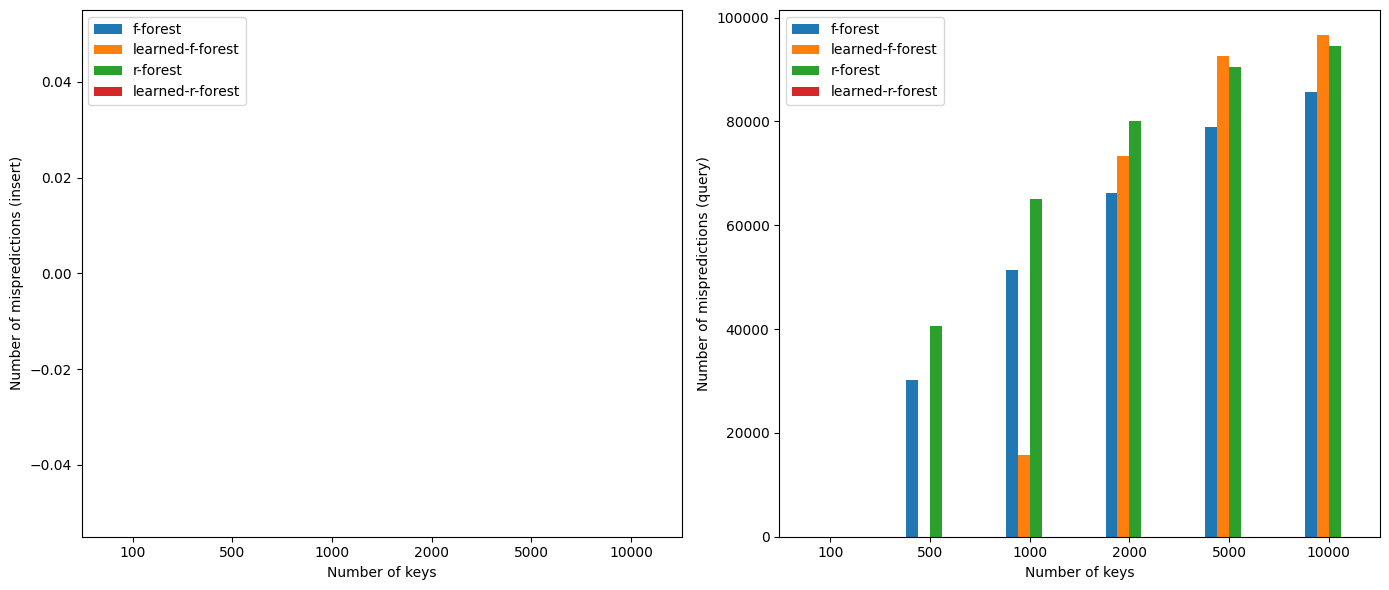


================== INSERTS ==================
Total: 100
Comparisons: 
  red-black tree:     16.18
  f-forest:           16.18
  learned f-forest:   16.18
  r-forest:           16.18
  learned r-forest:   14.88
  robust-sl:          5.59
  learned treap:      3.89

================== QUERIES ==================
Total: 100
Comparisons: 
  red-black tree:     8.20
  f-forest:           8.20
  learned f-forest:   8.20
  r-forest:           8.20
  learned r-forest:   10.28
  robust-sl:          15.64
  learned treap:      12.66

================== INSERTS ==================
Total: 500
Comparisons: 
  red-black tree:     25.03
  f-forest:           21.22
  learned f-forest:   21.16
  r-forest:           21.22
  learned r-forest:   14.94
  robust-sl:          8.70
  learned treap:      5.64

================== QUERIES ==================
Total: 500
Comparisons: 
  red-black tree:     10.36
  f-forest:           12.49
  learned f-forest:   9.29
  r-forest:           26.73
  learned r-forest:  

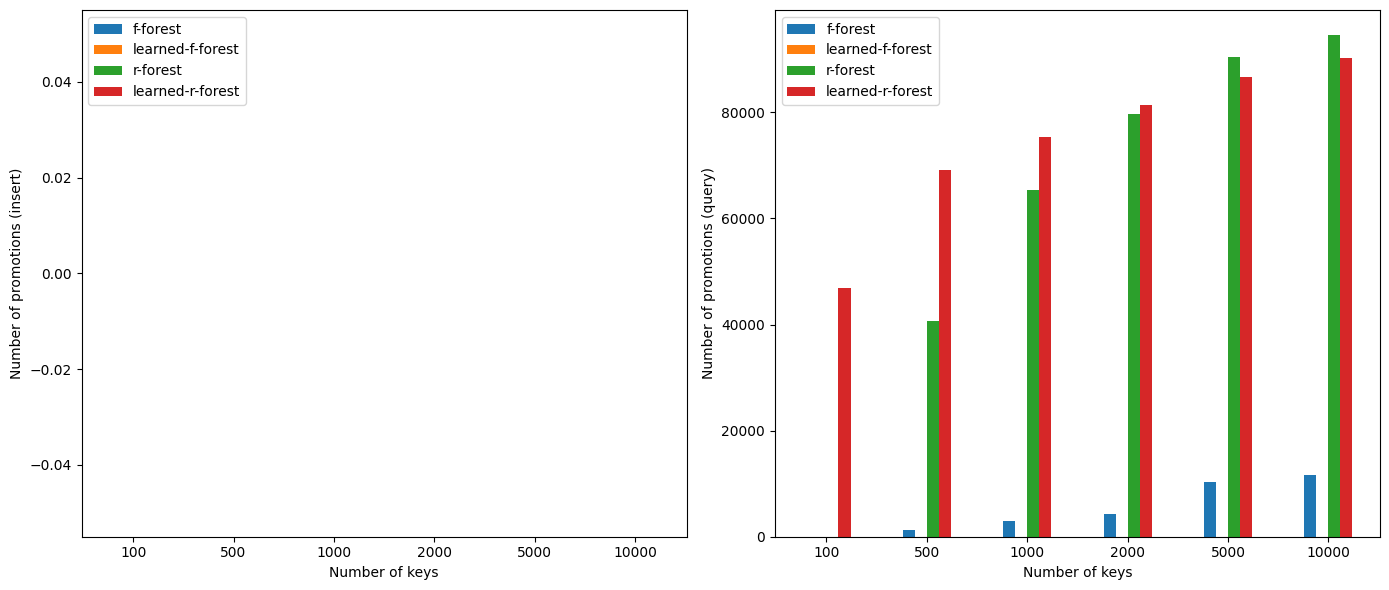

In [10]:
keys = [100, 500, 1000, 2000, 5000, 10000]
run_key_experiments(keys, delta=0.9)

In [19]:
def run_alpha_experiments(alphas, measure, y_label, key=NUM_KEYS, query=NUM_QUERIES, gen=gen):
    query_stats = {}
    insert_stats = {}

    for alpha in alphas:
        queries = generate_zipf_queries(key, query, alpha, gen)
        out = benchmark(queries, key, gen)

        query_stats[alpha] = out["queries"][measure]
        insert_stats[alpha] = out["inserts"][measure]

    structures = list(query_stats[alphas[0]].keys())
    print("*" * 40)
    print(query_stats)
    print(insert_stats)
    print("*" * 40)

    plot_res(alphas, structures, query_stats, insert_stats, "Zipf Alpha", y_label)


================== INSERTS ==================
Total: 100000
Comparisons: 
  red-black tree:     55.45
  f-forest:           51.01
  learned f-forest:   40.58
  r-forest:           51.01
  learned r-forest:   40.91
  robust-sl:          18.52
  learned treap:      27.01

================== QUERIES ==================
Total: 100000
Comparisons: 
  red-black tree:     18.10
  f-forest:           95.87
  learned f-forest:   12.68
  r-forest:           190.40
  learned r-forest:   34.33
  robust-sl:          46.23
  learned treap:      55.50

================== INSERTS ==================
Total: 100000
Comparisons: 
  red-black tree:     55.45
  f-forest:           51.01
  learned f-forest:   40.58
  r-forest:           51.01
  learned r-forest:   40.76
  robust-sl:          17.08
  learned treap:      20.95

================== QUERIES ==================
Total: 100000
Comparisons: 
  red-black tree:     18.10
  f-forest:           95.37
  learned f-forest:   12.62
  r-forest:           189.8

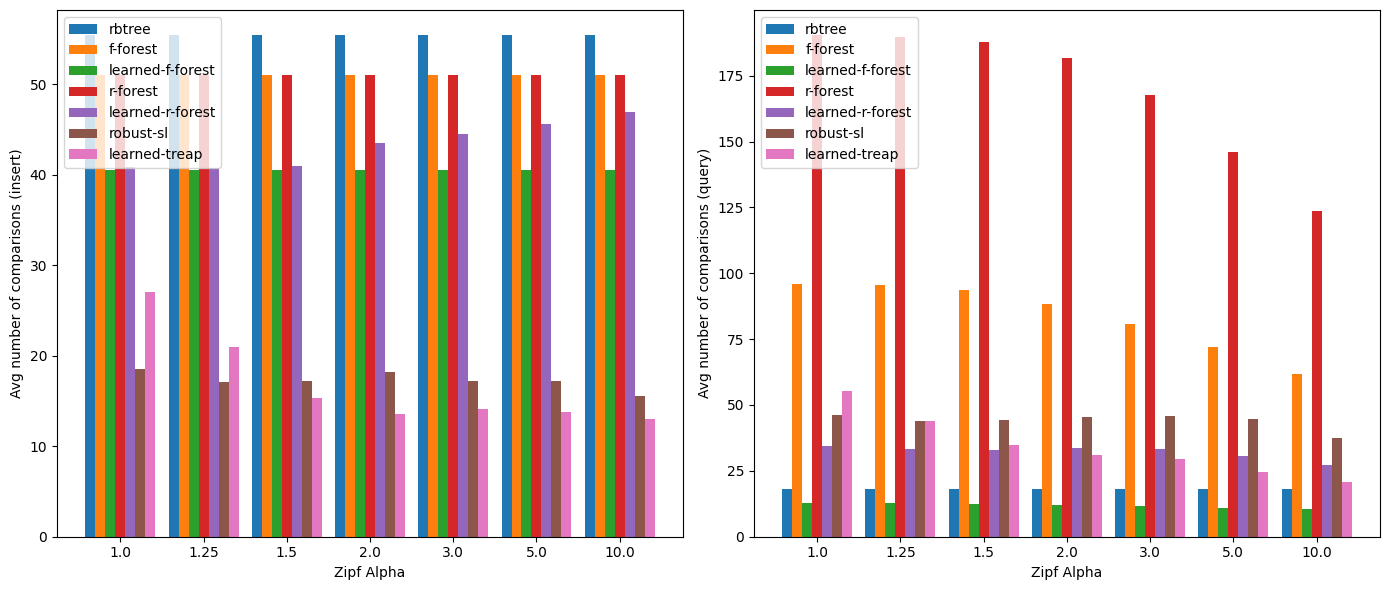


================== INSERTS ==================
Total: 100000
Comparisons: 
  red-black tree:     55.45
  f-forest:           51.01
  learned f-forest:   40.58
  r-forest:           51.01
  learned r-forest:   40.83
  robust-sl:          19.62
  learned treap:      24.58

================== QUERIES ==================
Total: 100000
Comparisons: 
  red-black tree:     18.09
  f-forest:           94.96
  learned f-forest:   12.67
  r-forest:           189.78
  learned r-forest:   34.16
  robust-sl:          48.71
  learned treap:      50.51

================== INSERTS ==================
Total: 100000
Comparisons: 
  red-black tree:     55.45
  f-forest:           51.01
  learned f-forest:   40.58
  r-forest:           51.01
  learned r-forest:   40.72
  robust-sl:          19.18
  learned treap:      19.33

================== QUERIES ==================
Total: 100000
Comparisons: 
  red-black tree:     18.09
  f-forest:           95.74
  learned f-forest:   12.63
  r-forest:           190.3

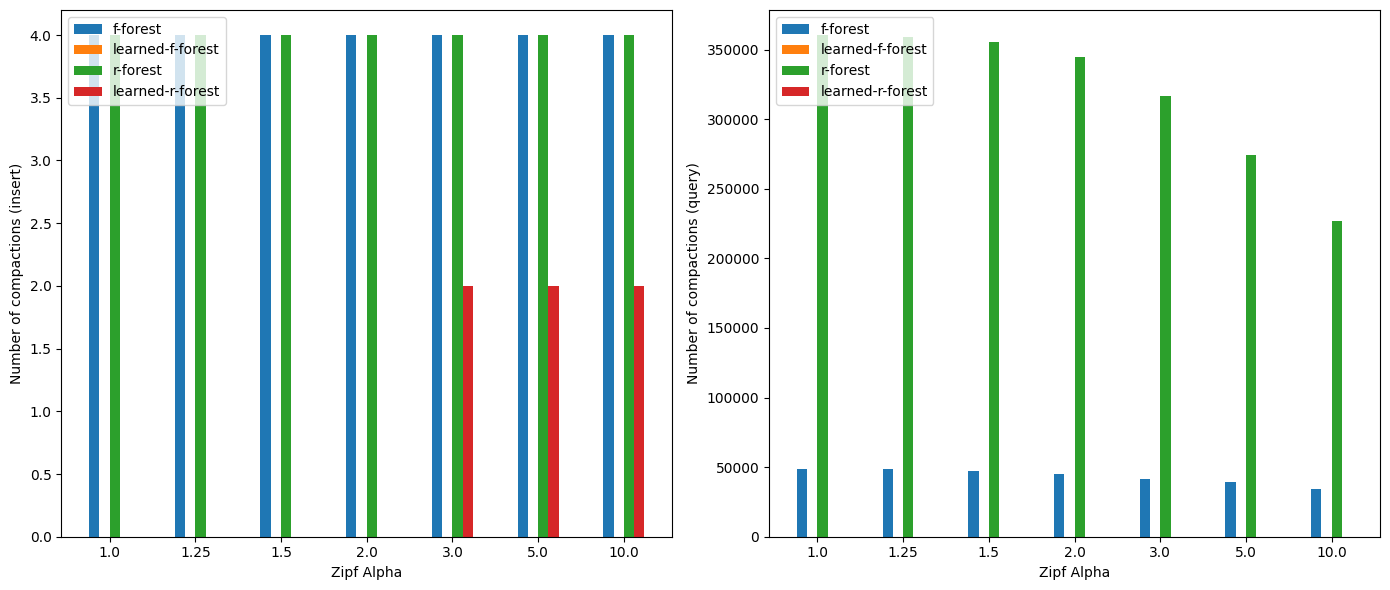


================== INSERTS ==================
Total: 100000
Comparisons: 
  red-black tree:     55.45
  f-forest:           51.01
  learned f-forest:   40.58
  r-forest:           51.01
  learned r-forest:   40.75
  robust-sl:          20.33
  learned treap:      29.06

================== QUERIES ==================
Total: 100000
Comparisons: 
  red-black tree:     18.09
  f-forest:           95.60
  learned f-forest:   12.68
  r-forest:           190.22
  learned r-forest:   33.27
  robust-sl:          53.61
  learned treap:      59.46

================== INSERTS ==================
Total: 100000
Comparisons: 
  red-black tree:     55.45
  f-forest:           51.01
  learned f-forest:   40.58
  r-forest:           51.01
  learned r-forest:   40.79
  robust-sl:          18.01
  learned treap:      19.20

================== QUERIES ==================
Total: 100000
Comparisons: 
  red-black tree:     18.10
  f-forest:           94.66
  learned f-forest:   12.62
  r-forest:           189.9

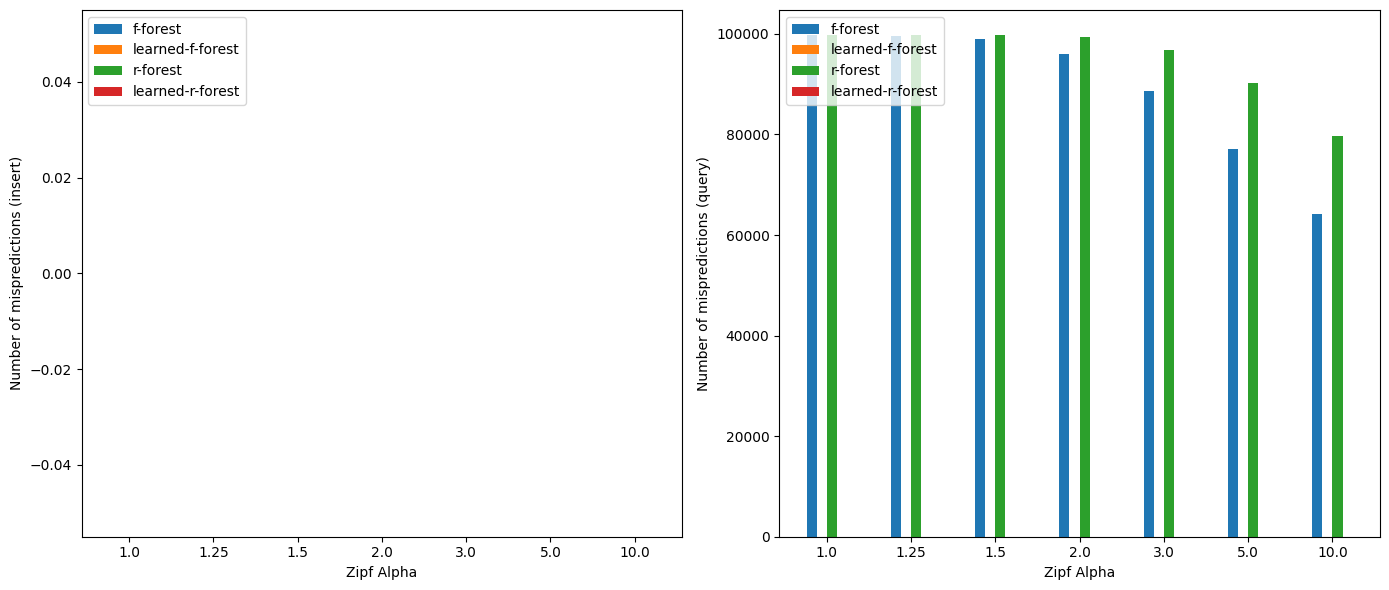


================== INSERTS ==================
Total: 100000
Comparisons: 
  red-black tree:     55.45
  f-forest:           51.01
  learned f-forest:   40.58
  r-forest:           51.01
  learned r-forest:   40.74
  robust-sl:          19.16
  learned treap:      25.35

================== QUERIES ==================
Total: 100000
Comparisons: 
  red-black tree:     18.10
  f-forest:           95.53
  learned f-forest:   12.67
  r-forest:           190.50
  learned r-forest:   35.27
  robust-sl:          48.54
  learned treap:      52.06

================== INSERTS ==================
Total: 100000
Comparisons: 
  red-black tree:     55.45
  f-forest:           51.01
  learned f-forest:   40.58
  r-forest:           51.01
  learned r-forest:   41.02
  robust-sl:          22.82
  learned treap:      20.29

================== QUERIES ==================
Total: 100000
Comparisons: 
  red-black tree:     18.10
  f-forest:           95.50
  learned f-forest:   12.62
  r-forest:           189.5

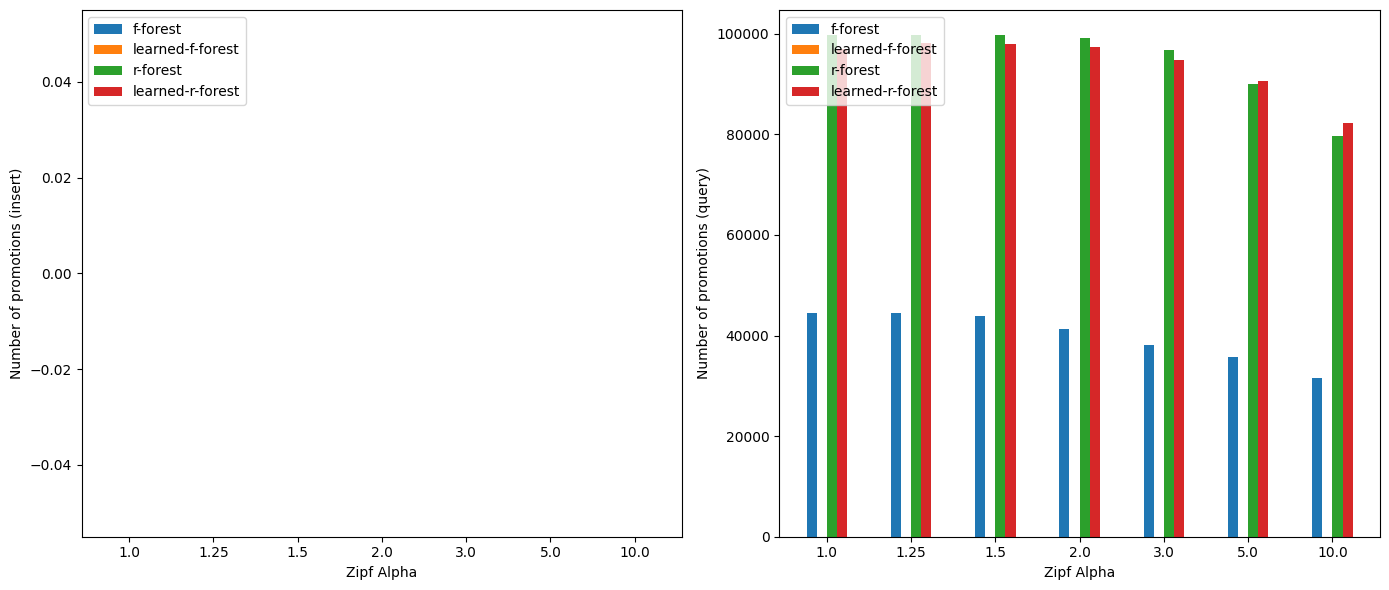

In [20]:
alphas = [1., 1.25, 1.5, 2., 3., 5., 10.]
run_alpha_experiments(alphas, "comparisons", "Avg number of comparisons")
run_alpha_experiments(alphas, "compactions", "Number of compactions")
run_alpha_experiments(alphas, "mispredictions", "Number of mispredictions")
run_alpha_experiments(alphas, "promotions", "Number of promotions")